In [1]:
import dendropy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir
from copy import deepcopy
from scipy.spatial.distance import squareform
from dendropy.calculate.treecompare import false_positives_and_negatives

rcParams = {'font.size': 20 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

def Robinson_Foulds(tr1, tr2):
    lb1 = set([l.taxon.label for l in tr1.leaf_nodes()])
    lb2 = set([l.taxon.label for l in tr2.leaf_nodes()])
    com = lb1.intersection(lb2)
    tns = dendropy.TaxonNamespace(com)
    tr1.retain_taxa_with_labels(com)
    tr1.migrate_taxon_namespace(tns)
    tr2.retain_taxa_with_labels(com)
    tr2.migrate_taxon_namespace(tns)
    tr1.update_bipartitions()
    tr2.update_bipartitions()
    [fp, fn] = false_positives_and_negatives(tr1, tr2)
    nl = len(com)
    rf = (fp+fn)/(2.0*nl-6.0)
    return rf



In [27]:
gene_tree_path = '/Users/harihara/Mount/CMSC829A/Data/Core_Gene_RAXML_Tree/'
files = listdir(gene_tree_path)
species_tree_path = '/Users/harihara/Mount/CMSC829A/Data/Core_Species_Trees.tree'
species_tree = dendropy.Tree.get(path = species_tree_path, schema = "newick", rooting='force-unrooted')
out = []

for f in files:
    if 'best' in f:
        t = dendropy.Tree.get(path = gene_tree_path+f, schema = "newick", rooting='force-unrooted')
        gene = f.replace("RAxML_bestTree.T_","")
        rf = Robinson_Foulds(deepcopy(species_tree), deepcopy(t))
        out.append({'Gene':gene, 'RF':rf})
        print(gene,'\t',rf)

df_op = pd.DataFrame(out)
df_op = df_op.set_index('Gene')
df_op = df_op.sort_values(by = 'RF', ascending = False)


rpmA 	 0.6388323150033944
recG 	 0.5258992805755396
ybeY 	 0.5312925170068027
rpsA 	 0.5424200278164116
miaB 	 0.4876099120703437
rpsT 	 0.6677018633540373
rlmB 	 0.5514147688060732
rbfA 	 0.5329041487839771
coaD 	 0.5536684782608695
rplI 	 0.6161035226455788
polA 	 0.5218878248974008
ftsY 	 0.5150684931506849
rpsO 	 0.6230508474576271
gyrA 	 0.5322909585316111
rsmA 	 0.5285326086956522
rpsB 	 0.5594262295081968
clpX 	 0.5166780122532335
smpB 	 0.5756130790190735
ychF 	 0.5529891304347826
prmC 	 0.5359835503769705
recO 	 0.5192173305380853
rpsH 	 0.6752542372881356
rpsI 	 0.6508474576271186
rsmI 	 0.5310156782549421
purH 	 0.5334728033472803
pgsA 	 0.5378735232800556
recF 	 0.5980538922155688
era 	 0.5268524813052345
mfd 	 0.5072463768115942
ftsA 	 0.4548126377663483
rimP 	 0.5439944134078212
gyrB 	 0.5720108695652174
rplU 	 0.6184300341296929
uvrB 	 0.5105227427019687
grpE 	 0.5433403805496829
yajC 	 0.5961670088980151
rsmD 	 0.5617198335644937
ruvB 	 0.5251358695652174
ffh 	 0.496255

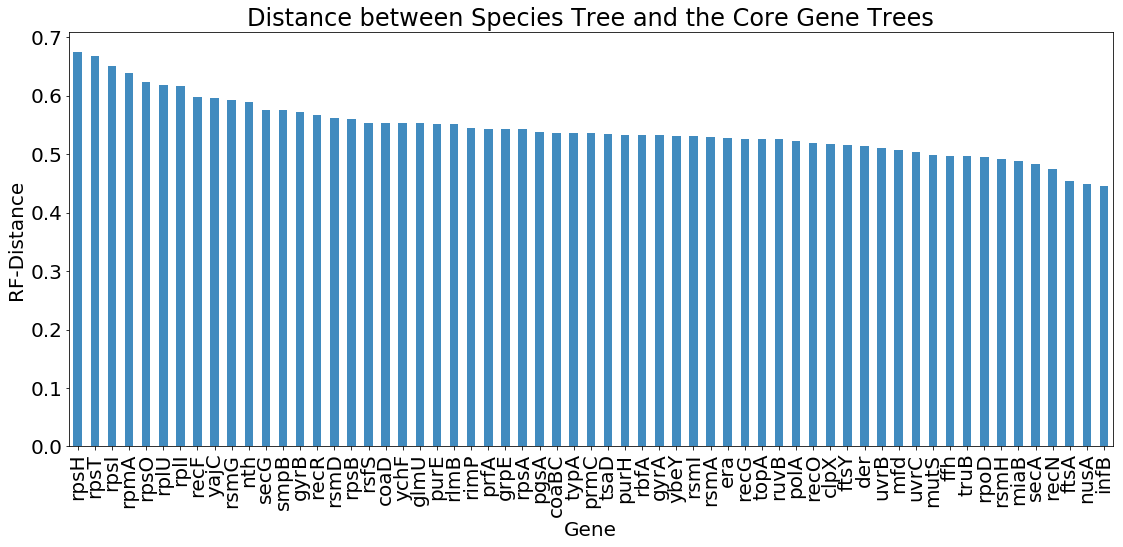

In [49]:
plt.rcParams.update(rcParams)

fig, ax = plt.subplots(1,1,figsize = (16,8))
df_op.plot(kind = 'bar', ax = ax, legend = "", alpha = 0.85)
ax.set_ylabel('RF-Distance')
ax.set_title('Distance between Species Tree and the Core Gene Trees')
fig.tight_layout()

fig.savefig('/Users/harihara/UMD_Coursework/Fall_2021/CMSC829A/Project/Plots/Species_Tree_Core_Gene_Tree_RF.pdf')